## Problem Statement

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

We will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
ds=pd.read_csv('Telecom_customer_churn.csv')
df=pd.DataFrame(ds)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Analysis of Data

In [3]:
df.shape

(7043, 21)

There are 21 features including one output variable (Churn). We hae 7043 observations in this dataset.

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
pd.options.display.max_columns = df.shape[1] 

In [8]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,5025-GOOKI,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


- customerId is unique for each customer and do not impact our target variable. So this can be dropped.
- gender column has two unique values only, Male and Female. Male is the dominant category with 3555 out of 7043.
- Partner column has two different values, Yes and No. No is the frequently occuring one.
- Dependents column has two different values, Yes and No. No is the frequently occuring one.
- PhoneService has also values Yes and No, Yes being the dominant one.
- InternetService has 3 different values. The most common is Fiber optic.
- Tenure ranges from 0 to 72.
- OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies and Contract can have 3 unique values.
- PaperlessBilling can have two unique values, Yes and No. Yes is the most common option with more than 50% values.
- There can be 4 different payment methods. THe most frequently opted method is Electronic check. 
- Churn is the target variable and can have values Yes and No.


## Checking Missing Data

In [9]:
print("Missing in our dataset: ")
display(df.isnull().sum())

Missing in our dataset: 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

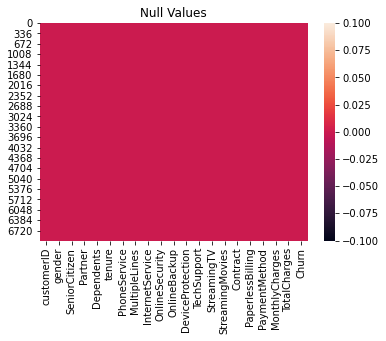

In [10]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

There is no missing data in the dataset.

## Plotting of Data

In [11]:
cat_col=df.select_dtypes(include='object')
cat_col.drop(['customerID'],axis=1,inplace=True)
cat_col.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

**Target Variable data distribution**

Text(0.5, 1.0, '% of Customers Churn')

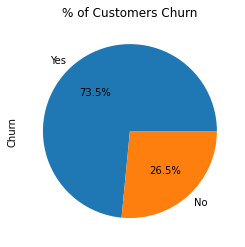

In [12]:
import matplotlib.ticker as mtick
ax = (df['Churn'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Yes', 'No'])                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('% of Customers Churn')

The above plot shows the distribution of customers churn. There are 26.5% customers who churn, while others do not.

**Categorical Variables distribution**

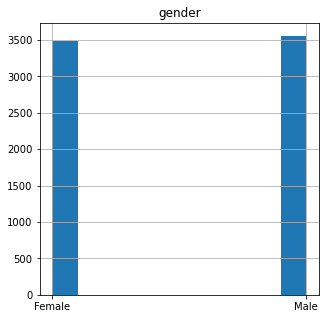

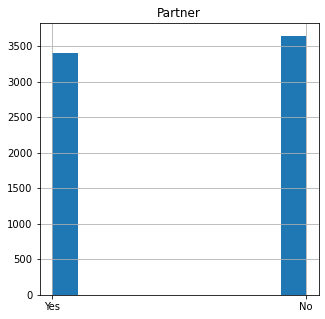

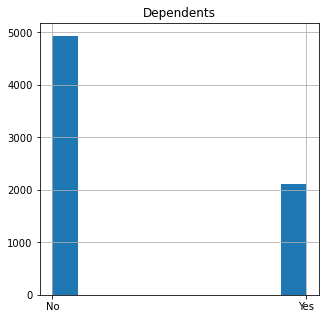

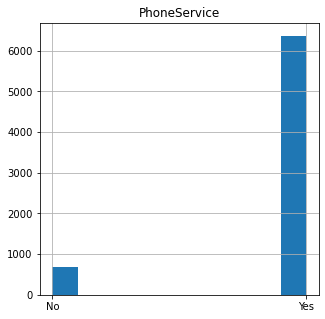

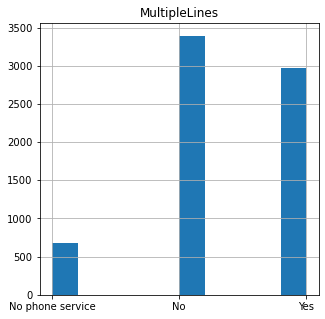

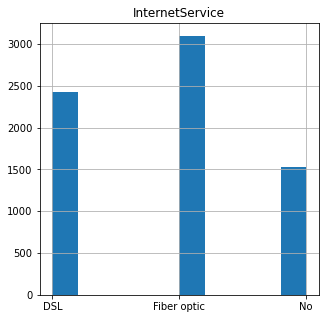

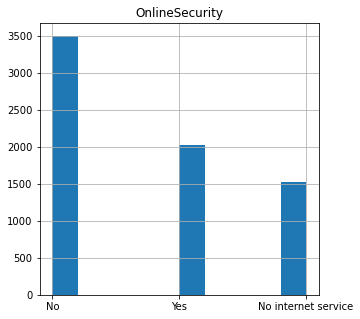

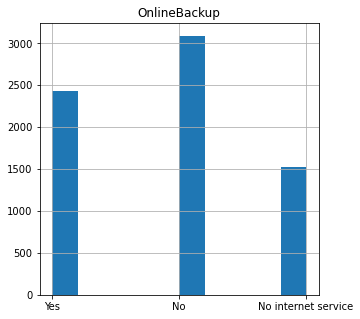

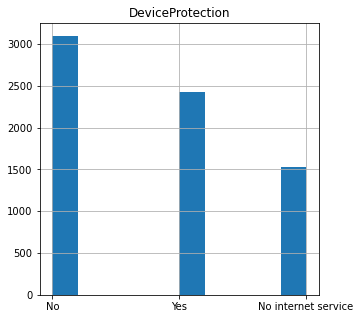

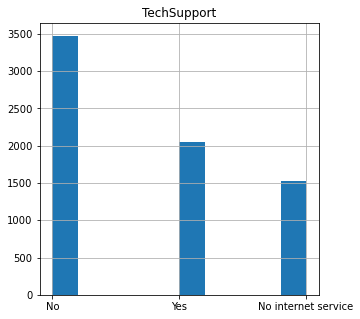

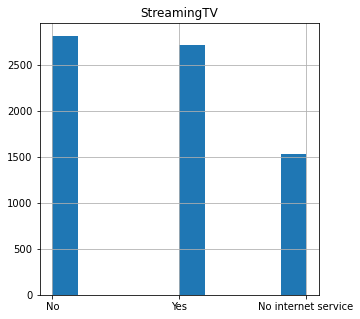

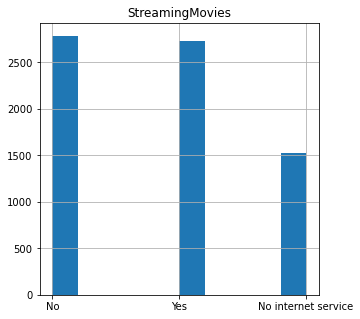

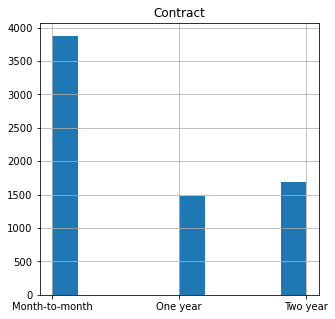

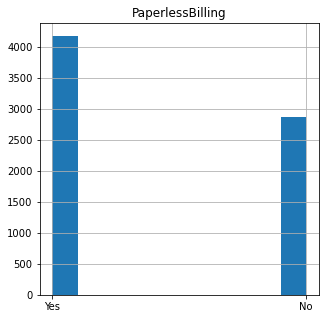

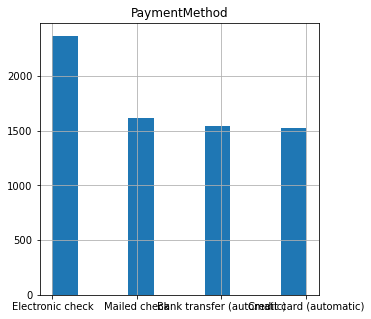

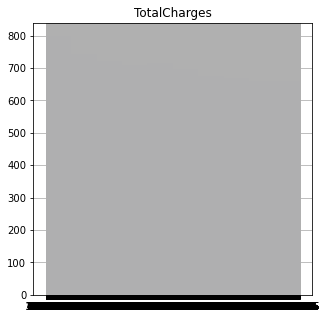

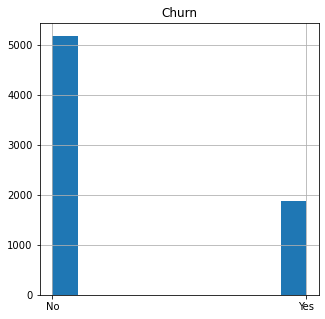

In [13]:
for i in cat_col.columns:
    plt.figure()
    df[i].hist(figsize=(5,5))
    plt.title(i)
    plt.show()

- There are more males than females.
- There are more people who have no partnership.
- More count of people do not have dependents.
- Most of the customers have Phone service opted.
- There are some customers who have multiple lines of service, while there are few (approax 600) who do not have even a single phone service.
- Large proportion of people have Fiber Optic (more than 3000) while some have DSL (around 2400). There are few (more than 1500) people who do not have any internet service.
- More people have no internet security.
- More than 3000 people who have no online backup. Around 2400 people have online security.
- More than 3000 people have device protection.
- Around 3500 people have Tech Support.
- The ratio of people who have Streaming Tv and who do have, is almost same.
- The ratio of people who have Streaming movies and who do have, is also almost same.
- Majority of people have month-to-month contract while others have two year and one year contract.
- Paperless billing is more common option.
- Electronic checks have more count as Payment method, while other counts are almost same.


<Figure size 432x288 with 0 Axes>

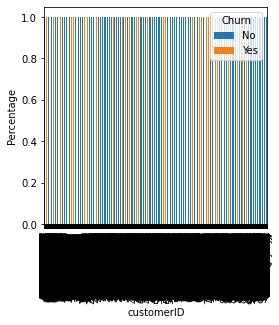

<Figure size 432x288 with 0 Axes>

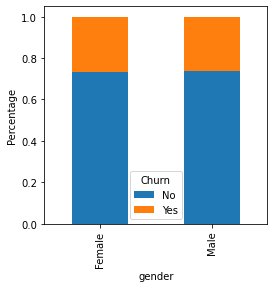

<Figure size 432x288 with 0 Axes>

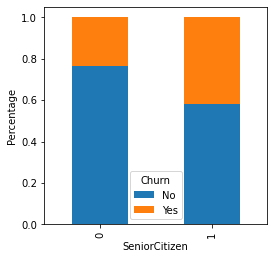

<Figure size 432x288 with 0 Axes>

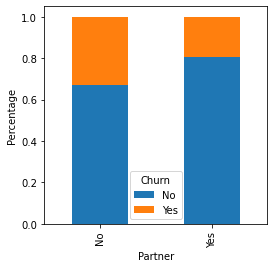

<Figure size 432x288 with 0 Axes>

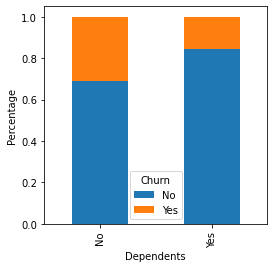

<Figure size 432x288 with 0 Axes>

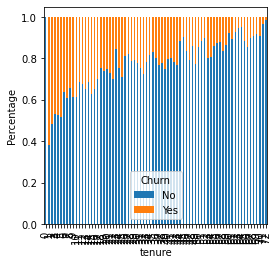

<Figure size 432x288 with 0 Axes>

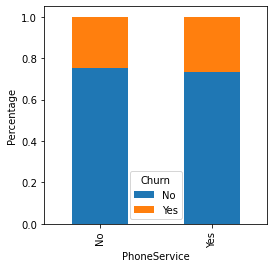

<Figure size 432x288 with 0 Axes>

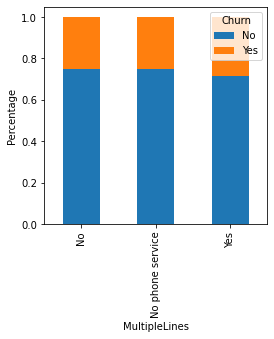

<Figure size 432x288 with 0 Axes>

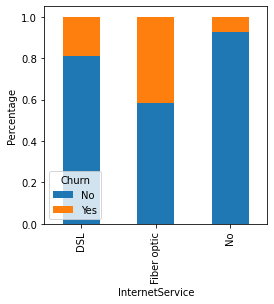

<Figure size 432x288 with 0 Axes>

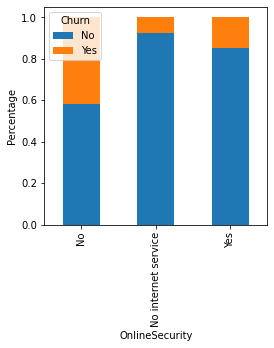

<Figure size 432x288 with 0 Axes>

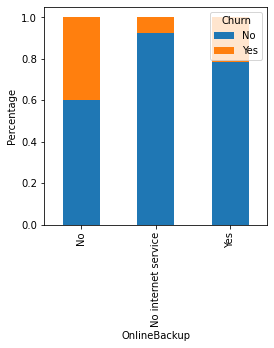

<Figure size 432x288 with 0 Axes>

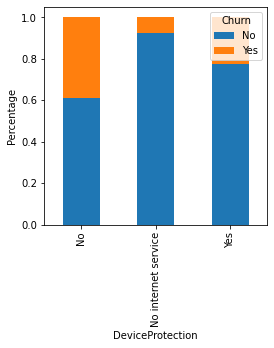

<Figure size 432x288 with 0 Axes>

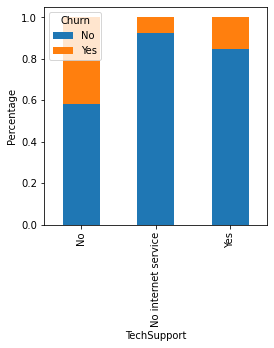

<Figure size 432x288 with 0 Axes>

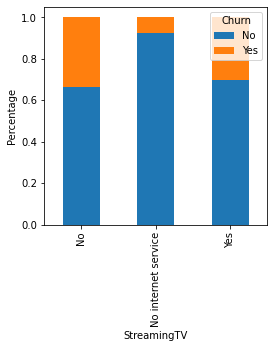

<Figure size 432x288 with 0 Axes>

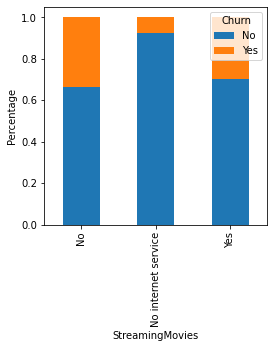

<Figure size 432x288 with 0 Axes>

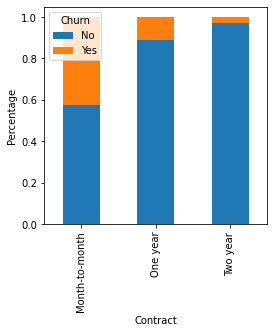

<Figure size 432x288 with 0 Axes>

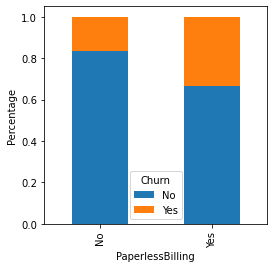

<Figure size 432x288 with 0 Axes>

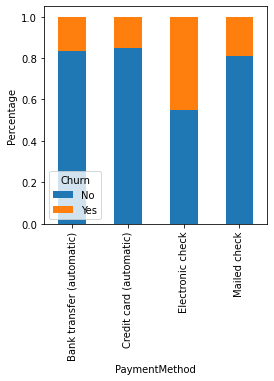

<Figure size 432x288 with 0 Axes>

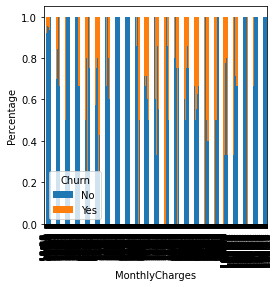

<Figure size 432x288 with 0 Axes>

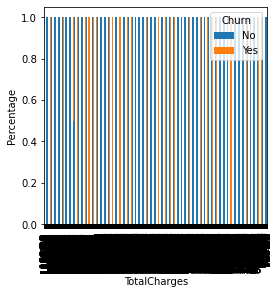

<Figure size 432x288 with 0 Axes>

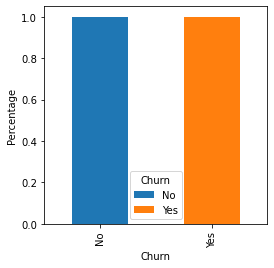

In [14]:
for i in df:
    col=pd.crosstab(df[i],df['Churn'])
    plt.figure()
    col.div(col.sum(1).astype(int),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
    plt.xlabel(i)
    p = plt.ylabel('Percentage')

- It seems like no of male and females customer churning is almost same.
- The customers who have partnership are less likely to Churn.
- The customers who have dependents have less churning rate.
- The phone service people churning have same count.
- The customers with No phone service, multiple phone service and No phone service have similar attrition rate.
- The customers with fiber optic internet service are churning more than customers with no internet service or DSL.
- The customers with No online security are more likely to churn.
- The customers with No device protection are more likely to churn.
- The customers with Tech support have less attrition rate.
- The customers who have a month to month contract have a very high churn rate while the customers who have two year contract have a very low churn rate. This indicates that customers with longer contract period are more loyal to the company.


**Numeric Variables Distribution**

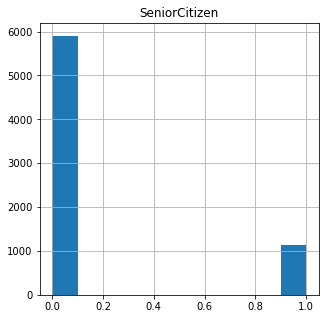

In [15]:
plt.figure()
df['SeniorCitizen'].hist(figsize=(5,5))
plt.title('SeniorCitizen')
plt.show()

Text(0.5, 1.0, 'Tenure')

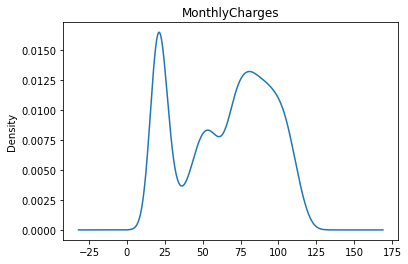

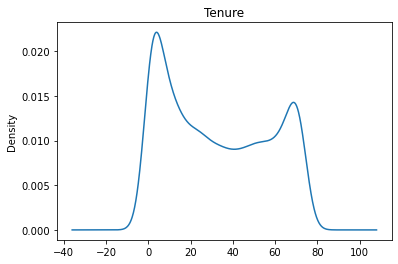

In [16]:
plt.figure()
df['MonthlyCharges'].plot(kind='density')
plt.title('MonthlyCharges')

plt.figure()
df['tenure'].plot(kind='density')
plt.title('Tenure')

- There are very few senior citizens in our dataset. Majority of customers are young.
- Monthly charges vary from 0 to around 120.
- Tenure vary from 0 to around 80.

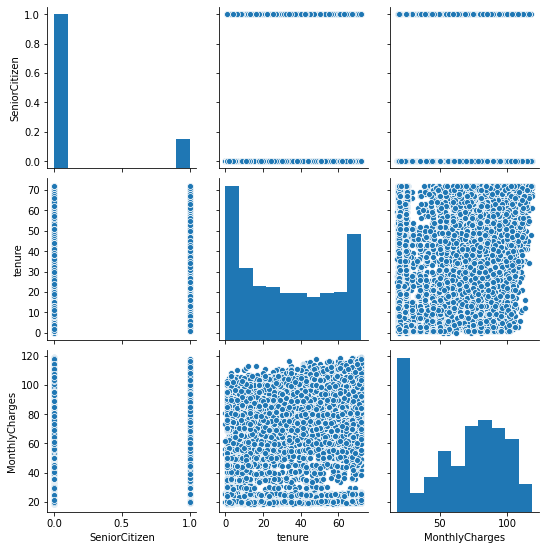

In [17]:
sns.pairplot(df)

## Label Encoding

Lets drop customer id first as it does not play any role.

In [18]:
df.drop('customerID', axis=1, inplace=True)

Lets do Label encoding to convert our categorical variables into numeric variables.

In [19]:
cat_col

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_col.columns:
    df[i]=le.fit_transform(df[i])

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


## Checking Correlation

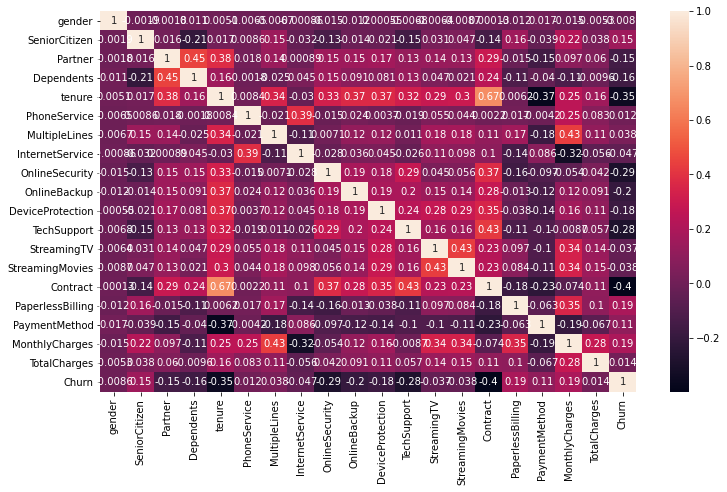

In [22]:
corr_mat=df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_mat,annot=True)
plt.show()

In [23]:
corr_matrix=df.corr()
corr_matrix['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation. We can see some variables have positive correlation with the target variable.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation. We can see some variables have negative correlation with the target variable

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. So we can carry on with all features.

Contract and tenure are most closely related to the target variable. Other features like Online Security and Tech Support also impacts the Churn rate.


## ML Model Development

In [24]:
x=df.drop('Churn', axis=1)
y=df['Churn']

In [37]:
#Finding best random_state
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
maxAccu=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)
    

Best accuracy is  0.8177946048272599 on random state  178


**Building the model**

Let's try different algorithms and find out the accuracy for each model. We will also consider the cross validation score to check if the accuracy is due to overfitting.

The model with high accuracy and low difference between accuracy score and cross validation score will be considered as the best fit model.

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=178)

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

model_classify = [RandomForestClassifier(n_estimators=100),KNeighborsClassifier(n_neighbors = 5),GaussianNB() ,LinearSVC(), DecisionTreeClassifier(),AdaBoostClassifier(),LogisticRegression()]
df_result=pd.DataFrame(columns=['Model','Accuracy','Cross Validation Score','Difference'])


for model in model_classify:
    m = model
    test_string=str(m)
    spl_word='('
    print('Model: ',m)
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    acc_final=acc*100
    print('Score: ', acc_final)
    scr=cross_val_score(m,x,y,cv=5)
    scr_final=(scr.mean())*100
    print('Cross validation score: ',scr_final)
    diff=((acc*100)-scr_final)
    print('Difference between cross validation score and accuracy is ', diff)
    print('Confusion matrix: ', confusion_matrix(y_test,pred))
    print('Classification report: ', classification_report(y_test,pred))
    print('------------------------------------------------')
    df_result=df_result.append({'Model':test_string,'Accuracy':acc_final,'Cross Validation Score':scr_final,'Difference':diff}, ignore_index=True)
    

Model:  RandomForestClassifier()
Score:  79.60246095598676
Cross validation score:  79.12832077875993
Difference between cross validation score and accuracy is  0.474140177226829
Confusion matrix:  [[1407  148]
 [ 283  275]]
Classification report:                precision    recall  f1-score   support

           0       0.83      0.90      0.87      1555
           1       0.65      0.49      0.56       558

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.80      0.79      2113

------------------------------------------------
Model:  KNeighborsClassifier()
Score:  75.67439659252247
Cross validation score:  74.7408401348474
Difference between cross validation score and accuracy is  0.933556457675067
Confusion matrix:  [[1371  184]
 [ 330  228]]
Classification report:                precision    recall  f1-score   support

           0       0.81      0.88      0.84      1555
           1       0

In [39]:
df_result

,Model,Accuracy,Cross Validation Score,Difference
0,RandomForestClassifier(),79.602461,79.128321,0.474140
1,KNeighborsClassifier(),75.674397,74.740840,0.933556
2,GaussianNB(),76.999527,75.578596,1.420931
3,LinearSVC(),65.641268,70.212564,-4.571296
4,DecisionTreeClassifier(),71.651680,72.596629,-0.944949
5,AdaBoostClassifier(),80.832939,80.249925,0.583014
6,LogisticRegression(),81.779460,79.994455,1.785005


Logistic Regression is the best fit model for our dataset.

In [43]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred = LR.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy is ',acc*100)

Accuracy is  81.77946048272598


**Feature Importance**

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

Feature importance scores play an important role in a predictive modeling project, including providing insight into the data, insight into the model, and the basis for dimensionality reduction and feature selection that can improve the efficiency and effectiveness of a predictive model on the problem.

Sklearn measures a feature importance by looking at how much the tree nodes uses that feature, reduced impurity on average (across all trees in the forest). It computes this score automatically for each feature after training and scales the results so that the sum of all importances is equal to 1.

In [44]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(DT.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
MonthlyCharges,0.227
TotalCharges,0.189
Contract,0.170
tenure,0.150
PaymentMethod,0.043
gender,0.029
DeviceProtection,0.023
MultipleLines,0.022
OnlineSecurity,0.022


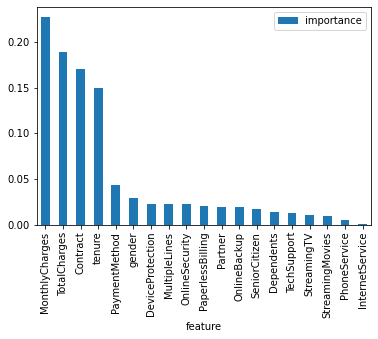

In [45]:
importances.plot.bar()

**Hyper Parameter Tuning using Grid Search CV**

In [46]:
parameters = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
from sklearn.model_selection import GridSearchCV, cross_val_score
LR = LogisticRegression()
clf = GridSearchCV(estimator=LR, param_grid=parameters, scoring='accuracy')
clf.fit(x_train, y_train)
clf.best_params_

{'C': 10, 'penalty': 'l2'}

Testing the model with our best fit parameters

In [47]:
LR = LogisticRegression(C=10,penalty='l2')

LR.fit(x_train, y_train)
pred = LR.predict(x_test)

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

print('Accuracy Score : ' , accuracy_score(y_test,pred))
print('Precision Score : ', precision_score(y_test,pred))
print('Recall Score : ' , recall_score(y_test,pred))
print('F1 Score : ' , f1_score(y_test,pred))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,pred)

Accuracy Score :  0.8130619971604354
Precision Score :  0.673773987206823
Recall Score :  0.5663082437275986
F1 Score :  0.6153846153846154


array([[1402,  153],
       [ 242,  316]], dtype=int64)

**Confusion Matrix**

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

In [48]:
predictions = cross_val_predict(LR, x_train, y_train, cv=3)
confusion_matrix(y_test, pred)

array([[1402,  153],
       [ 242,  316]], dtype=int64)

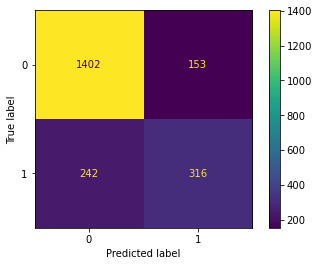

In [49]:
import sklearn
sklearn.metrics.plot_confusion_matrix(clf,x_test,y_test)

From the above plotting, we can see that 1402 is True Positive Value and 316 is the True Negative Value.
153 and 242 are error terms and represent False Positive and False Negative respectively. This indicates that 153 customers which are predicted as Churning are wrong  and 242 customers are predicted as not churning which were churning.

**Precision and Recall**

Precision is a useful metric in cases where False Positive is a higher concern than False Negatives.

Recall is a useful metric in cases where False Negative trumps False Positive.

In [50]:
# Precision and Recall:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.6291512915129152
Recall: 0.5202135774218154


Precision of our model is 62% and Recall is 52%. There is always a trade off between the two. 
Lets see F1 score for our model.

**F1 Score**

F1-score is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics. It is maximum when Precision is equal to Recall.

But there is a catch here. The interpretability of the F1-score is poor. This means that we don’t know what our classifier is maximizing – precision or recall? So, we use it in combination with other evaluation metrics which gives us a complete picture of the result.

In [51]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.5695198329853862

**Precision Recall Curve**

For each applicant, the algorithm has to classify, it computes a probability based on a function and it classifies the application as approved (when the score is bigger the than threshold) or as not approved (when the score is smaller than the threshold). That’s why the threshold plays an important part. We will plot the precision and recall with the threshold using matplotlib:

Getting the probabilities of our predictions.

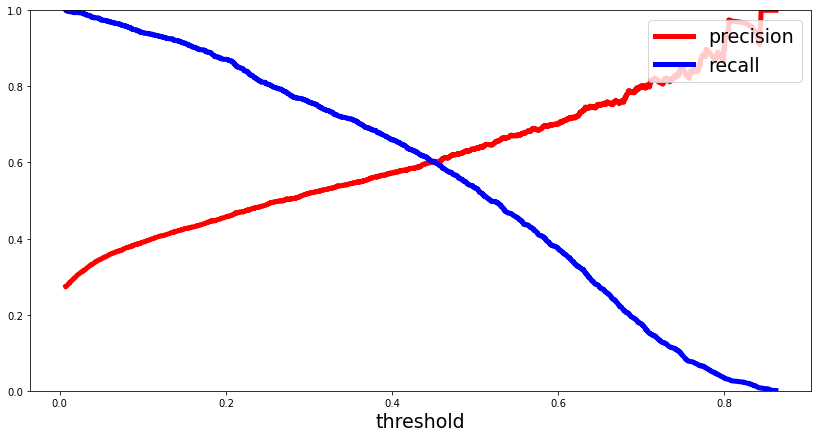

In [52]:
y_scores = LR.predict_proba(x_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

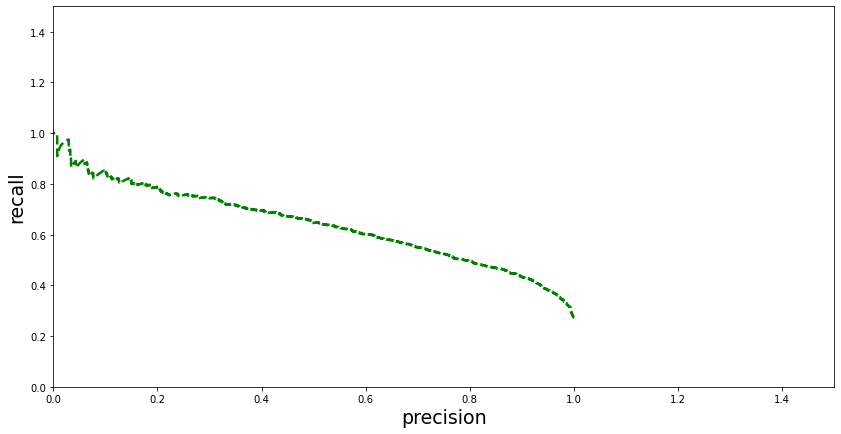

In [53]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

We can also use classification report to get this information.

In [54]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1555
           1       0.67      0.57      0.62       558

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.75      2113
weighted avg       0.81      0.81      0.81      2113



## Saving the final model

In [55]:
import joblib
joblib.dump(LR,'Customer Churn.obj')

['Customer Churn.obj']